# TASK 1: Prediction using Supervised ML

## Predict the percentage of an student based on the no. of study hours.

### Importing and reading the dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
url = r"http://bit.ly/w-data"
df = pd.read_csv(url)
print("Data import successfully")
df.head(10)

Data import successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes


In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [40]:
df.corr()

,Actual,Predicted
Actual,1.000000,0.985289
Predicted,0.985289,1.000000


### Input data Visualization

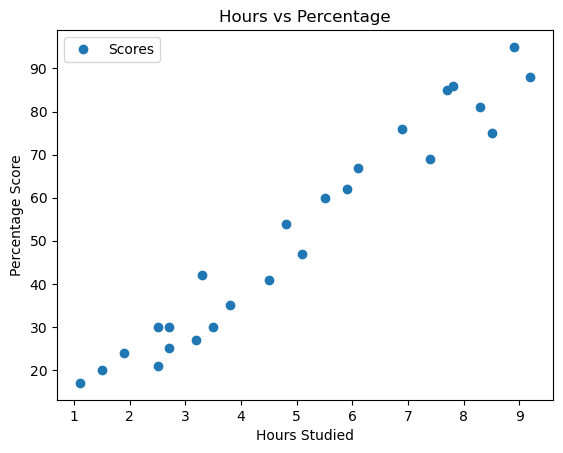

In [44]:
df.plot(x='Hours', y= 'Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()



### Data Preprocessing

In [34]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

### Model Training

In [16]:
from sklearn.linear_model import LinearRegression
reg= LinearRegression()
reg.fit(X_train, y_train)
print("training complete.")

training complete.


### Testing the model

In [18]:
y_pred = reg.predict(X_test)
df2 = pd.DataFrame({'actual': y_test, 'predicted': y_pred})
df2

,actual,predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


### Visualizing the regression line on the data

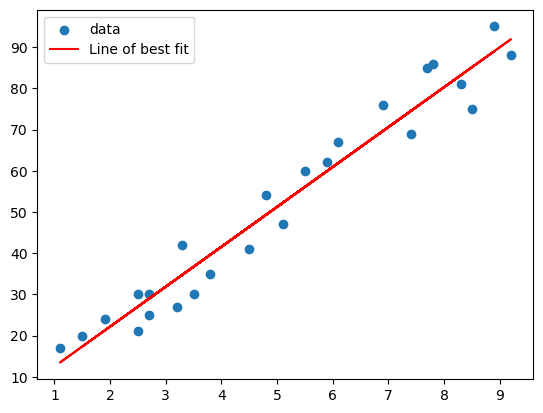

In [19]:
line = reg. coef_*X+reg.intercept_
plt.scatter(X, y, label='data')
plt.plot(X, line, label='Line of best fit',color='r')
plt.legend()

In [20]:
print("accuracy:", reg.score(X_test,y_test))
from sklearn import metrics
print('Mean absolute Error:' ,metrics.mean_absolute_error(y_test, y_pred))

accuracy: 0.9678055545167994
Mean absolute Error: 3.9207511902099244


### Making Predictions

In [22]:
hours = float(input())
own_pred = reg.predict([[hours]])
print("No. of HOurs = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

9.25
No. of HOurs = 9.25
Predicted Score = 92.38611528261494


### Comparing Actual result to the Prediction Model result

In [23]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


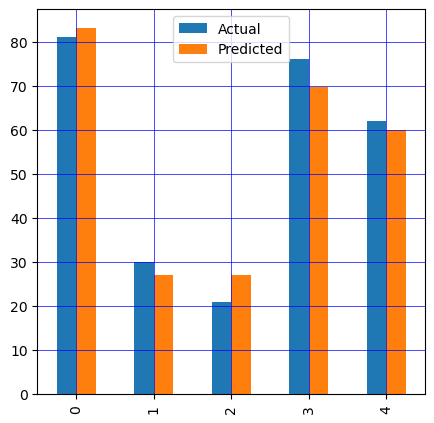

In [24]:
df.plot(kind='bar',figsize=(5,5))
plt.grid(which='major', linewidth='0.5', color='blue')
plt.grid(which='minor', linewidth='0.5', color='red')
plt.show()

In [26]:
hours = 9.25
test = np.array([hours])
test = test.reshape (-1, 1)
own_pred = reg.predict([[hours]])
print("No of Hours = {}".format (hours))
print("Predicted Score = {}". format (own_pred[0]))

No of Hours = 9.25
Predicted Score = 92.38611528261494


### Evaluating the model 

In [38]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 3.9207511902099244
Mean Squared Error: 18.943211722315272
Root Mean Squared Error: 4.352380006653288
R-2: 0.9678055545167994


## My Final Conclusion
## From the above result we can say that if a studied for 9.25 hours/day then student got 92.38% Marks.